# Some illustrative figures made using the unperturbed experiment

This notebook aims to create illustrative figures using the unperturbed experiment from which the initial states of each period are extracted. The figures created here depict the ice states at the beginning of each period.

Some functions used here come from the homemade Python package: libfig.py. So, make sure to install Python_library library and that Python is able to locate it: put **export PYTHONPATH=<path_to_Python_library\>:${PYTHONPATH}** in your .bashrc, .profile or equivalent.

In [1]:
#Importation of the different libraries

##Loading of NetCDF files
import xarray as xr

##Computing
import numpy as np

##Graphical display
import libfig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cmocean import cm

Name: libfig
Package: 
This is a collection of diverse functions for creating figures.


### Loading the NetCDF files of the unperturbed experiment (EABLBBM000)

In [2]:
#Definition of the different access paths and variables needed to access the data

diri="/lustre/fsstor/projects/rech/cli/commun/NANUK4/" #path to the directory containing all the experiments

#variables to reconstruct the name of the experiment
simu_prefix="NANUK4_ICE_ABL"
simu_suffix="-S"

exp_name=["EABLBBM"]
exp_num=["000"]
nb_member=1 #number of members

print(exp_name)
print(exp_num)
print(len(exp_name)==len(exp_num))

['EABLBBM']
['000']
True


In [3]:
#Loading the NetCDF files containing the sea ice variables for EABLBBM000

fq_outputs_sea_ice="1h" #hourly outputs

exp_name_tot=exp_name[0]+exp_num[0] #experiment name reconstruction

##Loading the files
path=diri+simu_prefix+"-"+exp_name_tot+simu_suffix+"/*/"+str(1).zfill(3)+"*"+fq_outputs_sea_ice+"*icemod.nc"
print(path)
dat_sea_ice=xr.open_mfdataset(path,decode_times=True)

print(len(exp_name_tot),exp_name_tot)

/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-EABLBBM000-S/*/001*1h*icemod.nc
10 EABLBBM000


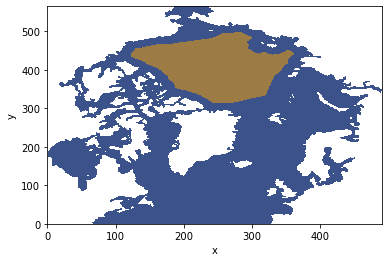

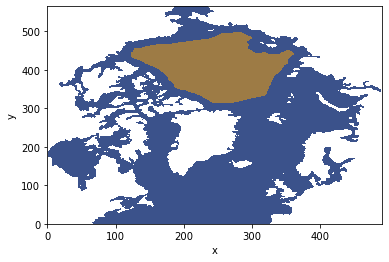

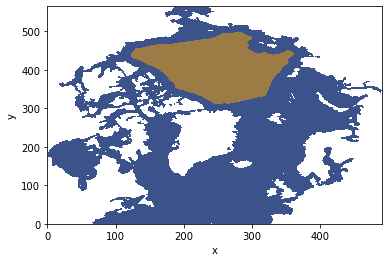

In [4]:
#Loading the mask files

dat_masks=xr.open_dataset(diri+"NANUK4.L31-I/mesh_mask_NANUK4_L31_4.2_1stLev.nc") #masks of the configuration
dat_masks_domain=xr.open_dataset("/lustre/fswork/projects/rech/cli/udf71br/Laurines_work_Datlas/Masks/masks_domain_threshold_0.5.nc") #masks of the domain

##Visualisation of the configuration and domain masks

plt.contourf(dat_masks.tmask[0,0,:,:].where(dat_masks.tmask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.tmask.where(dat_masks_domain.tmask>0),alpha=0.5,colors="orange")
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

plt.contourf(dat_masks.umask[0,0,:,:].where(dat_masks.umask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.umask.where(dat_masks_domain.umask>0),alpha=0.5,colors="orange")
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

plt.contourf(dat_masks.vmask[0,0,:,:].where(dat_masks.vmask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.vmask.where(dat_masks_domain.vmask>0),alpha=0.5,colors="orange")
plt.xlabel("x") ; plt.ylabel("y")
plt.show()

### Some useful precomputations

In [5]:
#Keeping only what will be useful for us 

##Concentration
dat_sea_ice_concentration=dat_sea_ice.siconc
print(dat_sea_ice_concentration.time_counter[0].values,dat_sea_ice_concentration.time_counter[-1].values)

##Thickness
dat_sea_ice_thickness=dat_sea_ice.sithic
print(dat_sea_ice_thickness.time_counter[0].values,dat_sea_ice_thickness.time_counter[-1].values)

##U-velocity
dat_sea_ice_uvelo=dat_sea_ice["u_ice-u"]
dat_sea_ice.close() #close the whole Dataset
print(dat_sea_ice_uvelo.time_counter[0].values,dat_sea_ice_uvelo.time_counter[-1].values)

1997-01-11T00:30:00.000000000 1997-05-31T23:30:00.000000000
1997-01-11T00:30:00.000000000 1997-05-31T23:30:00.000000000
1997-01-11T00:30:00.000000000 1997-05-31T23:30:00.000000000


In [6]:
#Saving instants of interest

    ##the dates that interest us
date_interest=["1997-01-16 00:30:00","1997-01-26 00:30:00","1997-02-05 00:30:00","1997-02-15 00:30:00","1997-02-25 00:30:00",\
                "1997-03-07 00:30:00","1997-03-17 00:30:00","1997-03-27 00:30:00"]

    ##convert the time of dat_sea_ice_concentration into a string of characters
str_time_simu_outputs=dat_sea_ice_concentration.time_counter.dt.strftime("%Y-%m-%d %H:%M:%S")

    ##look for the positions of the dates that interest us in str_time_simu_outputs
pos_interest=[]
for date in date_interest:
    pos_interest.append(np.where(str_time_simu_outputs==date)[0][0])

print(pos_interest,date_interest,dat_sea_ice_concentration.time_counter[pos_interest].values)

[120, 360, 600, 840, 1080, 1320, 1560, 1800] ['1997-01-16 00:30:00', '1997-01-26 00:30:00', '1997-02-05 00:30:00', '1997-02-15 00:30:00', '1997-02-25 00:30:00', '1997-03-07 00:30:00', '1997-03-17 00:30:00', '1997-03-27 00:30:00'] ['1997-01-16T00:30:00.000000000' '1997-01-26T00:30:00.000000000'
 '1997-02-05T00:30:00.000000000' '1997-02-15T00:30:00.000000000'
 '1997-02-25T00:30:00.000000000' '1997-03-07T00:30:00.000000000'
 '1997-03-17T00:30:00.000000000' '1997-03-27T00:30:00.000000000']


### Illustrative figures of the initial states of the unperturbed experiment at the beginning of each period

number of choosen subfigures = 8
number of choosen columns = 4
number of choosen rows = 2
choosen row with unequal number of columns: row -1
should be equal:  8 == 8
1997-01-16T00:30:00.000000000


<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-01-26T00:30:00.000000000
1997-02-05T00:30:00.000000000


<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-02-15T00:30:00.000000000
1997-02-25T00:30:00.000000000


<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-07T00:30:00.000000000
1997-03-17T00:30:00.000000000


<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-7-c10f1997c370>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-27T00:30:00.000000000


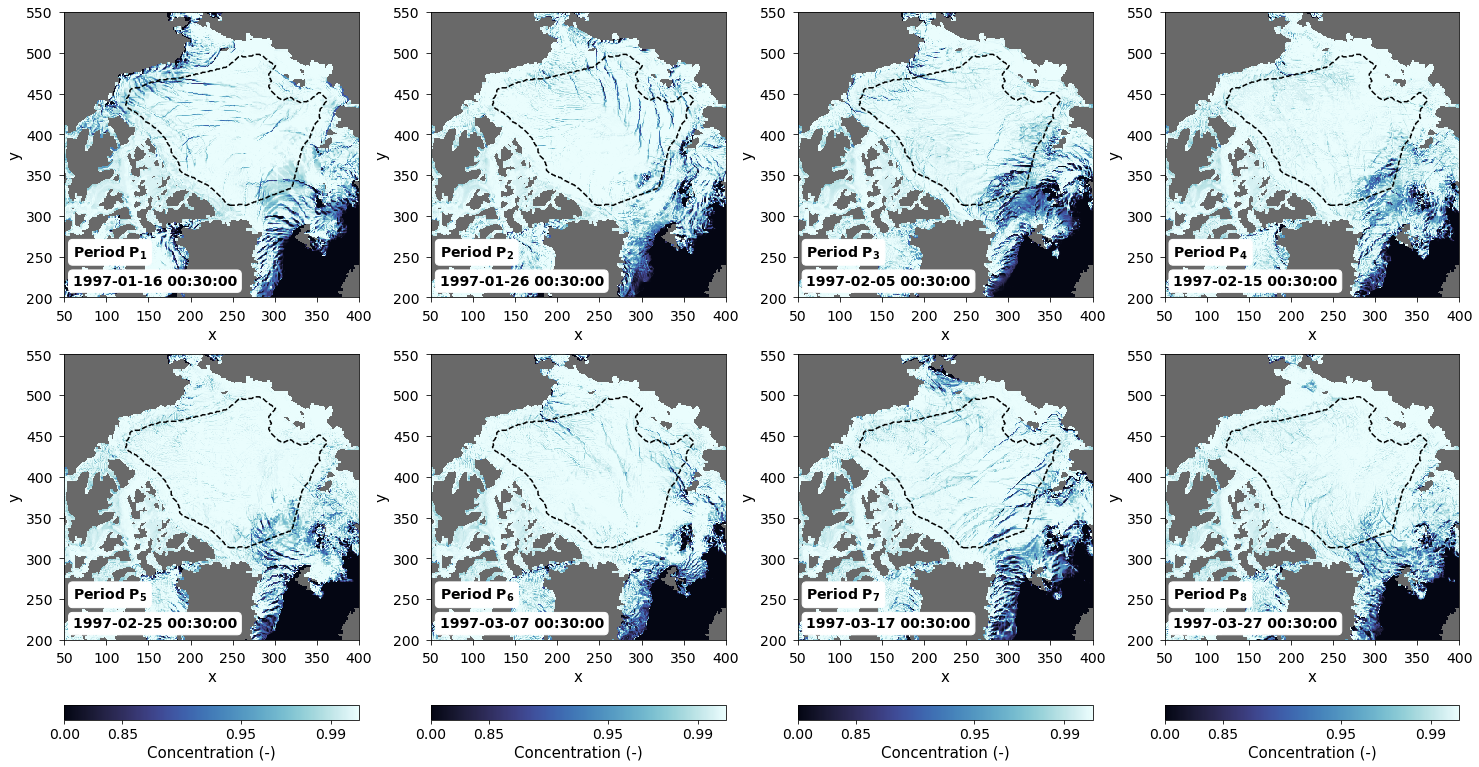

../Figures/Initial_concentration_maps_EABLBBM000_8periods.png


In [7]:
#Figure of the concentration field at the begin of each period

##Useful variables for the following
norm=mcolors.PowerNorm(gamma=10,vmin=0,vmax=1)
cmap=cm.ice

##Creation of the figure
fig=plt.figure(figsize=(25,15))
nsubfig=8 ; ncol=4 ; nrow=2
plt.subplots_adjust(wspace=0.65)
axs=libfig.faxes(nsubfig,ncol,nrow)

print("should be equal: ",len(axs),"==",len(pos_interest)) 

for iax in range(len(axs)): #iteration over the periods of interest

    print(dat_sea_ice_concentration.time_counter[pos_interest[iax]].values)

    ##Plot the concentration
    cf=axs[iax].pcolormesh(dat_sea_ice_concentration[pos_interest[iax],:,:].where(dat_masks.tmask[0,0,:,:]>0),norm=norm,cmap=cmap)
    axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest

        #colorbars on the last line
    if iax//4==1:
        cb=plt.colorbar(cf,ax=[axs[iax-4],axs[iax]],ticks=[0,0.85,0.95,0.99],orientation="horizontal",pad=0.08)
        cb.set_label('Concentration (-)',color="black",fontsize=15)
        cb.ax.tick_params(color="black",labelcolor="black",labelsize=14)

    ##Some informative texts
    axs[iax].text(60,250,"Period P"+r"$\mathbf{_{"+str(iax+1)+"}}$",fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
    axs[iax].text(60, 215,dat_sea_ice_concentration.time_counter.to_index()[pos_interest[iax]],fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

    ##Set up the background
    axs[iax].set_facecolor("dimgrey")
    
    ##Set up the axes
    axs[iax].set_xlim(50,400)
    axs[iax].set_ylim(200,550)
    axs[iax].set_xlabel("x",fontsize=15) ; axs[iax].set_ylabel("y",fontsize=15)
    axs[iax].tick_params(axis="both",labelsize=14,pad=8)

    for i, tick in enumerate(axs[iax].yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    for i, tick in enumerate(axs[iax].xaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    
plt.show()
##Saving the figure, make sure that the folder "../Figures" exists or change the path
print("../Figures/Initial_concentration_maps_"+exp_name_tot+"_8periods.png")
#fig.savefig("../Figures/Initial_concentration_maps_"+exp_name_tot+"_8periods.png",\
#           facecolor="white",edgecolor="none",bbox_inches='tight')

number of choosen subfigures = 8
number of choosen columns = 4
number of choosen rows = 2
choosen row with unequal number of columns: row -1
should be equal:  8 == 8
1997-01-16T00:30:00.000000000


<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-01-26T00:30:00.000000000
1997-02-05T00:30:00.000000000


<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-02-15T00:30:00.000000000
1997-02-25T00:30:00.000000000


<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-07T00:30:00.000000000
1997-03-17T00:30:00.000000000


<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-8-b85319f9ae15>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-27T00:30:00.000000000


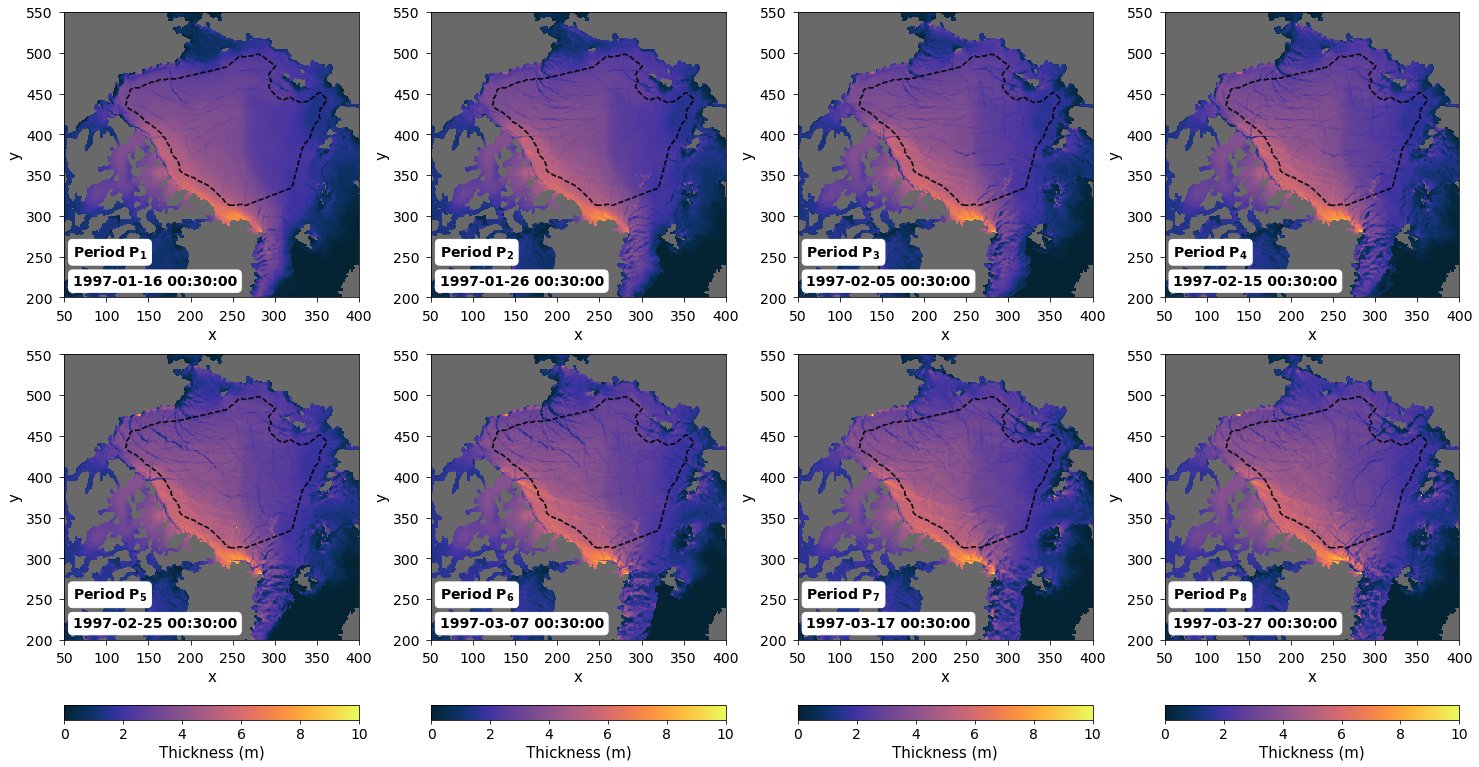

../Figures/Initial_thickness_maps_EABLBBM000_8periods.png


In [8]:
#Figure of the thickness field at the begin of each period

##Useful variables for the following
norm=mcolors.Normalize(vmin=0,vmax=10)
cmap=cm.thermal

##Creation of the figure
fig=plt.figure(figsize=(25,15))
nsubfig=8 ; ncol=4 ; nrow=2
plt.subplots_adjust(wspace=0.65)
axs=libfig.faxes(nsubfig,ncol,nrow)

print("should be equal: ",len(axs),"==",len(pos_interest)) 

for iax in range(len(axs)): #iteration over the periods of interest

    print(dat_sea_ice_thickness.time_counter[pos_interest[iax]].values)

    ##Plot the thickness
    cf=axs[iax].pcolormesh(dat_sea_ice_thickness[pos_interest[iax],:,:].where(dat_masks.tmask[0,0,:,:]>0),norm=norm,cmap=cmap)
    axs[iax].contour(dat_masks_domain.tmask.where(dat_masks.tmask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest

        #colorbars on the last line
    if iax//4==1:
        cb=plt.colorbar(cf,ax=[axs[iax-4],axs[iax]],ticks=[0,2,4,6,8,10],orientation="horizontal",pad=0.08)
        cb.set_label('Thickness (m)',color="black",fontsize=15)
        cb.ax.tick_params(color="black",labelcolor="black",labelsize=14)
        
    ##Some informative texts
    axs[iax].text(60,250,"Period P"+r"$\mathbf{_{"+str(iax+1)+"}}$",fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
    axs[iax].text(60, 215,dat_sea_ice_concentration.time_counter.to_index()[pos_interest[iax]],fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

    ##Set up the background
    axs[iax].set_facecolor("dimgrey")
    
    ##Set up the axes
    axs[iax].set_xlim(50,400)
    axs[iax].set_ylim(200,550)
    axs[iax].set_xlabel("x",fontsize=15) ; axs[iax].set_ylabel("y",fontsize=15)
    axs[iax].tick_params(axis="both",labelsize=14,pad=8)

    for i, tick in enumerate(axs[iax].yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    for i, tick in enumerate(axs[iax].xaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    
plt.show()
##Saving the figure, make sure that the folder "../Figures" exists or change the path
print("../Figures/Initial_thickness_maps_"+exp_name_tot+"_8periods.png")
#fig.savefig("../Figures/Initial_thickness_maps_"+exp_name_tot+"_8periods.png",\
#           facecolor="white",edgecolor="none",bbox_inches='tight')

number of choosen subfigures = 8
number of choosen columns = 4
number of choosen rows = 2
choosen row with unequal number of columns: row -1
should be equal:  8 == 8
1997-01-16T00:30:00.000000000


<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-01-26T00:30:00.000000000


<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-02-05T00:30:00.000000000
1997-02-15T00:30:00.000000000
1997-02-25T00:30:00.000000000


<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-07T00:30:00.000000000
1997-03-17T00:30:00.000000000


<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest
<ipython-input-9-b37eae3d1128>:21: UserWarning: No contour levels were found within the data range.
  axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest


1997-03-27T00:30:00.000000000


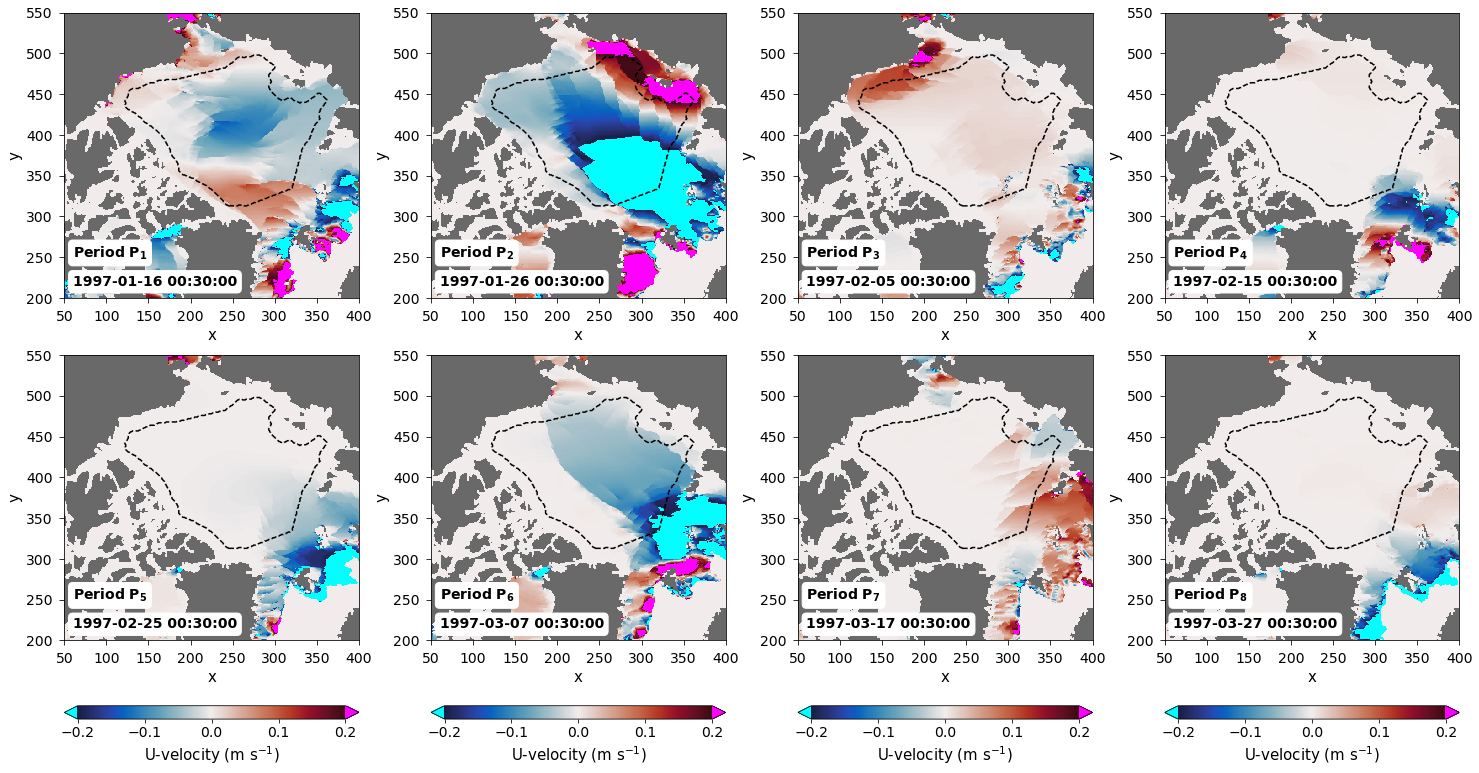

../Figures/Initial_uvelo_maps_EABLBBM000_8periods.png


In [9]:
#Figure of the u_velocity field at the begin of each period

##Useful variables for the following
norm=mcolors.Normalize(vmin=-0.2,vmax=0.2)
cmap=cm.balance ; cmap.set_under("cyan") ; cmap.set_over("magenta")

##Creation of the figure
fig=plt.figure(figsize=(25,15))
nsubfig=8 ; ncol=4 ; nrow=2
plt.subplots_adjust(wspace=0.65)
axs=libfig.faxes(nsubfig,ncol,nrow)

print("should be equal: ",len(axs),"==",len(pos_interest)) 

for iax in range(len(axs)): #iteration over the periods of interest

    print(dat_sea_ice_uvelo.time_counter[pos_interest[iax]].values)

    ##Plot the u-velocity
    cf=axs[iax].pcolormesh(dat_sea_ice_uvelo[pos_interest[iax],:,:].where(dat_masks.umask[0,0,:,:]>0),norm=norm,cmap=cmap)
    axs[iax].contour(dat_masks_domain.umask.where(dat_masks.umask[0,0,:,:]>0),levels=[1],colors="black",linestyles="--") #display the mask of the domain of interest

    #colorbars on the last line
    if iax//4==1:
        cb=plt.colorbar(cf,ax=[axs[iax-4],axs[iax]],ticks=[-0.2,-0.1,0,0.1,0.2],orientation="horizontal",pad=0.08,extend="both")
        cb.set_label('U-velocity ('+r'$\mathrm{m \ s^{-1}}$'+')',color="black",fontsize=15)
        cb.ax.tick_params(color="black",labelcolor="black",labelsize=14)
    
    ##Some informative texts
    axs[iax].text(60,250,"Period P"+r"$\mathbf{_{"+str(iax+1)+"}}$",fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
    axs[iax].text(60, 215,dat_sea_ice_concentration.time_counter.to_index()[pos_interest[iax]],fontsize=14,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

    ##Set up the background
    axs[iax].set_facecolor("dimgrey")
    
    ##Set up the axes
    axs[iax].set_xlim(50,400)
    axs[iax].set_ylim(200,550)
    axs[iax].set_xlabel("x",fontsize=15) ; axs[iax].set_ylabel("y",fontsize=15)
    axs[iax].tick_params(axis="both",labelsize=14,pad=8)

    for i, tick in enumerate(axs[iax].yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    for i, tick in enumerate(axs[iax].xaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
    
plt.show()
##Saving the figure, make sure that the folder "../Figures" exists or change the path
print("../Figures/Initial_uvelo_maps_"+exp_name_tot+"_8periods.png")
#fig.savefig("../Figures/Initial_uvelo_maps_"+exp_name_tot+"_8periods.png",\
#           facecolor="white",edgecolor="none",bbox_inches='tight')